In [1]:
import scipy.io
import numpy as np
import operator as op

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt # matplotlib
matplotlib.rcParams['figure.figsize'] = list(map(lambda x: 2*x, matplotlib.rcParams['figure.figsize']))
matplotlib.style.use('ggplot')

In [3]:
data_2 = scipy.io.loadmat('../../data2.mat')
data_1 = scipy.io.loadmat('../../data1.mat')
data_1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'bin', 'data1_Xian', 'label1', 'spotColumn1_Xian', 'spotRow1_Xian'])

In [4]:
coorX_1 = data_1['spotRow1_Xian'][0]
coorY_1 = data_1['spotColumn1_Xian'][0]
mz_values_1 = data_1['bin'].T
mz_values_1

array([[  1996.95878277],
       [  1998.24538575],
       [  1999.53198872],
       ..., 
       [ 20005.54064941],
       [ 20006.82725239],
       [ 20008.11385537]])

In [5]:
coorY_2 = data_2['spotColumn2_Xian'][0]
coorX_2 = data_2['spotRow2_Xian'][0]
mz_values_2 = data_2['bin'].T

In [6]:
coorX_1 -= coorX_1.min()
coorY_1 -= coorY_1.min()

nrows_1 = coorX_1.max() + 1
ncols_1 = coorY_1.max() + 1
print('nrows %d, ncols %d' % (nrows_1, ncols_1))

nrows 129, ncols 154


In [7]:
coorX_2 -= coorX_2.min()
coorY_2 -= coorY_2.min()

nrows_2 = coorX_2.max() + 1
ncols_2 = coorY_2.max() + 1
print('nrows %d, ncols %d' % (nrows_2, ncols_2))

nrows 98, ncols 138


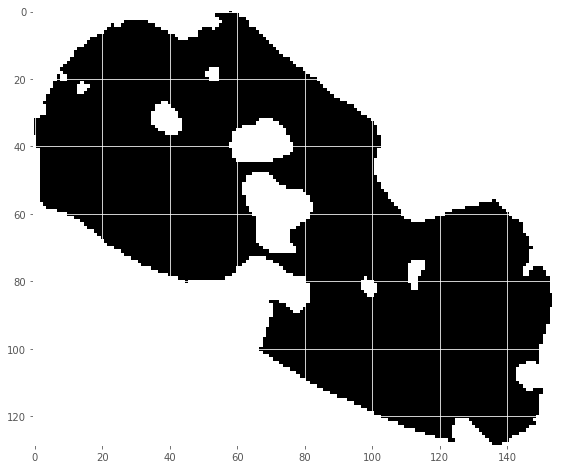

In [8]:
mask_1 = np.zeros((nrows_1, ncols_1))
for r, c in zip(coorX_1, coorY_1):
    mask_1[r,c] = 1

plt.imshow(mask_1, cmap='binary')

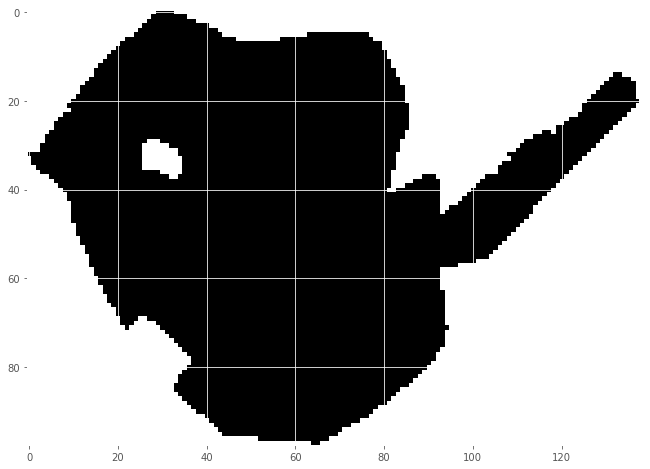

In [9]:
mask_2 = np.zeros((nrows_2, ncols_2))
for r, c in zip(coorX_2, coorY_2):
    mask_2[r,c] = 1

plt.imshow(mask_2, cmap='binary')

In [10]:
data_cube_1 = np.zeros((nrows_1, ncols_1, mz_values_1.shape[0]))
data_cube_1[coorX_1, coorY_1, :] = data_1["data1_Xian"]

data_matrix_1 = data_1['data1_Xian']
data_matrix_1.shape

(9577, 14000)

In [11]:
data_cube_2 = np.zeros((nrows_2, ncols_2, mz_values_2.shape[0]))
data_cube_2[coorX_2, coorY_2, :] = data_2["data2_Xian"]

data_matrix_2 = data_2['data2_Xian']
data_matrix_2.shape

(6869, 14000)

In [12]:
row2grid_1 = {r: (coorX_1[r], coorY_1[r]) for r in range(data_matrix_1.shape[0])}
grid2row_1 = {(coorX_1[r], coorY_1[r]): r for r in range(data_matrix_1.shape[0])}

get_bin_1 = lambda mz: np.argmin(np.abs(mz_values_1 - mz))

real_rows_1 = []
real_rows_xy_1 = []
for r in range(nrows_1):
    for c in range(ncols_1):
        try:
            row_1 = grid2row_1[(r, c)]
            real_rows_xy_1.append((r, c))
            real_rows_1.append(row_1)
        except:
            pass
        
real_rows_1 = np.array(real_rows_1)
real_rows_1.shape

real_rows_xy_1 = np.array(np.array(real_rows_xy_1))
real_rows_xy_1.shape

(9577, 2)

In [13]:
row2grid_2 = {r: (coorX_2[r], coorY_2[r]) for r in range(data_matrix_2.shape[0])}
grid2row_2 = {(coorX_2[r], coorY_2[r]): r for r in range(data_matrix_2.shape[0])}

get_bin_2 = lambda mz: np.argmin(np.abs(mz_values_2 - mz))

real_rows_2 = []
real_rows_xy_2 = []
for r in range(nrows_2):
    for c in range(ncols_2):
        try:
            row_2 = grid2row_2[(r, c)]
            real_rows_xy_2.append((r, c))
            real_rows_2.append(row_2)
        except:
            pass
        
real_rows_2 = np.array(real_rows_2)
real_rows_2.shape

real_rows_xy_2 = np.array(np.array(real_rows_xy_2))
real_rows_xy_2.shape

(6869, 2)

In [14]:
def make_image_1(rows): # very inefficient implementation but doesnt matter
    """Makes a 2d image from row indices in raw data."""
    img_1 = np.zeros((nrows_1, ncols_1)) + 1   
    for r in range(nrows_1):
        for c in range(ncols_1):
            try:
                row = grid2row_1[(r, c)]
                img_1[r, c] = rows[row]
            except:
                pass
    return img_1

def make_image_real_1(rows):
    """Makes a 2d image from real rows with data (i.e., rows in real_rows)."""
    img_1 = np.zeros((nrows_1, ncols_1)) 
    for idx, val in enumerate(rows):
        x, y = real_rows_xy_1[idx]
        img_1[x, y] = val
    return img_1

In [15]:
def make_image_2(rows): # very inefficient implementation but doesnt matter
    """Makes a 2d image from row indices in raw data."""
    img_2 = np.zeros((nrows_2, ncols_2)) + 1   
    for r in range(nrows_2):
        for c in range(ncols_2):
            try:
                row = grid2row_2[(r, c)]
                img_2[r, c] = rows[row]
            except:
                pass
    return img_2

def make_image_real_2(rows):
    """Makes a 2d image from real rows with data (i.e., rows in real_rows)."""
    img_2 = np.zeros((nrows_2, ncols_2)) 
    for idx, val in enumerate(rows):
        x, y = real_rows_xy_2[idx]
        img_2[x, y] = val
    return img_2

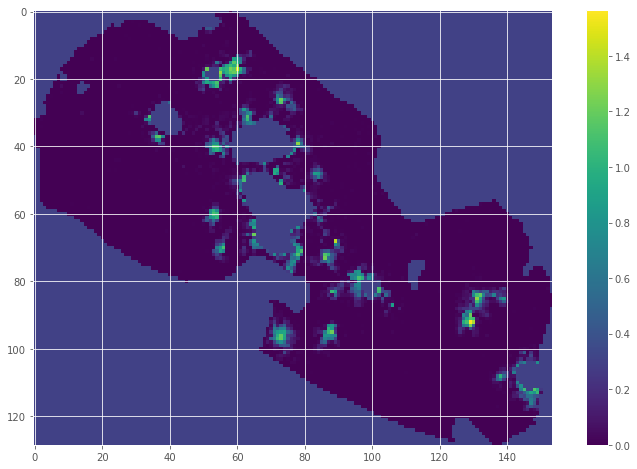

In [16]:
bin_idx_1 = get_bin_1(5800) # molecular mass 5800
#plt.imshow(data_cube[:,:, insulin_bin_idx])

bin_img_1 = make_image_1(data_matrix_1[:, bin_idx_1]) 

plt.imshow(np.log10(1+bin_img_1), cmap = 'viridis') # log10 changes the distribution so we can see what's going on better
plt.colorbar()
#python 3

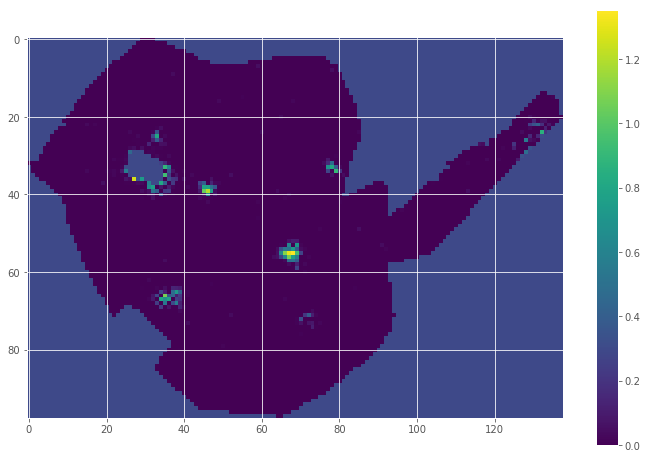

In [17]:
bin_idx_2 = get_bin_2(5800) # molecular mass 5800
#plt.imshow(data_cube[:,:, insulin_bin_idx])

bin_img_2 = make_image_2(data_matrix_2[:, bin_idx_2]) 

plt.imshow(np.log10(1+bin_img_2), cmap = 'viridis') # log10 changes the distribution so we can see what's going on better
plt.colorbar()
#python 3

(array([  8.43300000e+03,   2.39000000e+02,   9.80000000e+01,
          1.04000000e+02,   6.40000000e+01,   4.90000000e+01,
          5.40000000e+01,   3.50000000e+01,   3.40000000e+01,
          3.20000000e+01,   3.30000000e+01,   2.40000000e+01,
          2.00000000e+01,   2.20000000e+01,   2.00000000e+01,
          2.10000000e+01,   2.40000000e+01,   1.20000000e+01,
          1.90000000e+01,   5.00000000e+00,   1.40000000e+01,
          2.10000000e+01,   2.40000000e+01,   1.40000000e+01,
          2.50000000e+01,   1.70000000e+01,   1.00000000e+01,
          9.00000000e+00,   9.00000000e+00,   7.00000000e+00,
          1.20000000e+01,   6.00000000e+00,   8.00000000e+00,
          9.00000000e+00,   7.00000000e+00,   1.10000000e+01,
          7.00000000e+00,   7.00000000e+00,   7.00000000e+00,
          4.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
        

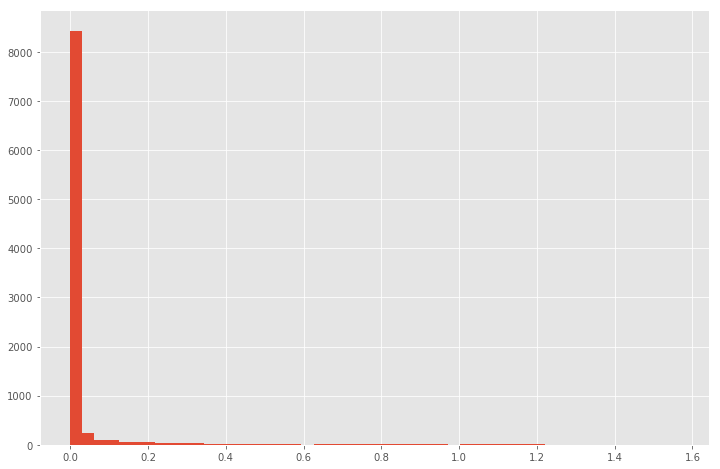

In [18]:
plt.hist(np.log10(1+data_matrix_1[:, bin_idx_1]), bins=50)
#in m/z = 5800, each 'pixel' intensity

(array([  6.65400000e+03,   5.40000000e+01,   2.30000000e+01,
          1.20000000e+01,   1.20000000e+01,   9.00000000e+00,
          3.00000000e+00,   6.00000000e+00,   8.00000000e+00,
          5.00000000e+00,   6.00000000e+00,   3.00000000e+00,
          8.00000000e+00,   4.00000000e+00,   5.00000000e+00,
          5.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          4.00000000e+00,   4.00000000e+00,   1.00000000e+00,
          3.00000000e+00,   5.00000000e+00,   0.00000000e+00,
          3.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          3.00000000e+00,   4.00000000e+00,   5.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
        

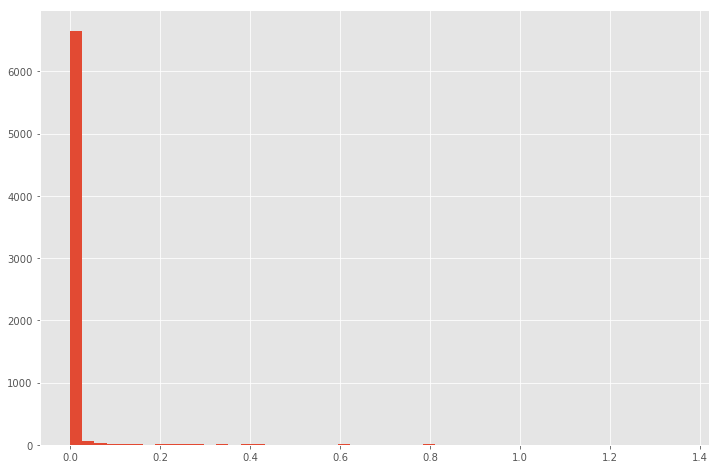

In [19]:
plt.hist(np.log10(1+data_matrix_2[:, bin_idx_2]), bins=50)
#in m/z = 5800, each 'pixel' intensity

Normalization TIC

In [20]:
#normalisation TIC: calculate the sum of all peaks' intensities in a spectrum as the normalization factor and then all spectrum intensities 
#are divided by this value
data_matrix_1_ = data_matrix_1.astype(np.float64)
row_sums_1 = data_matrix_1_.sum(axis=1)
data_matrix_1 = data_matrix_1_ / row_sums_1[:, np.newaxis]
data_matrix_1.shape

(9577, 14000)

(array([  9.03900000e+03,   1.46000000e+02,   7.30000000e+01,
          5.00000000e+01,   4.10000000e+01,   3.40000000e+01,
          2.90000000e+01,   3.00000000e+01,   1.90000000e+01,
          1.30000000e+01,   1.10000000e+01,   1.00000000e+01,
          7.00000000e+00,   1.40000000e+01,   8.00000000e+00,
          5.00000000e+00,   5.00000000e+00,   2.00000000e+00,
          1.00000000e+01,   5.00000000e+00,   7.00000000e+00,
          2.00000000e+00,   4.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

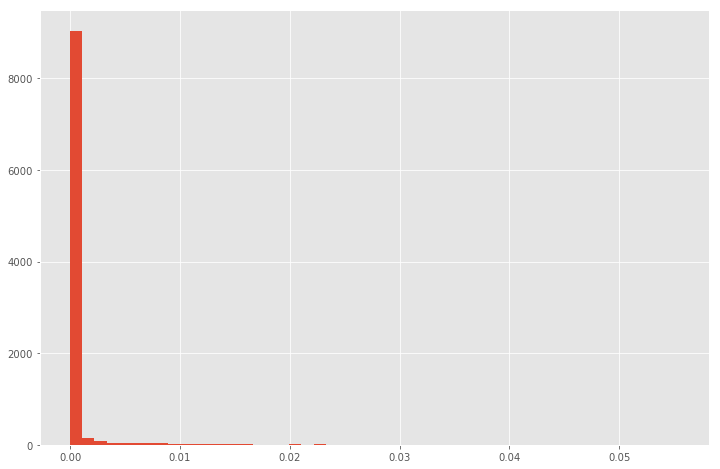

In [21]:
plt.hist(np.log10(1+data_matrix_1[:, bin_idx_1]), bins=50)

(array([  6.74800000e+03,   3.60000000e+01,   1.00000000e+01,
          1.40000000e+01,   9.00000000e+00,   6.00000000e+00,
          6.00000000e+00,   6.00000000e+00,   2.00000000e+00,
          7.00000000e+00,   5.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

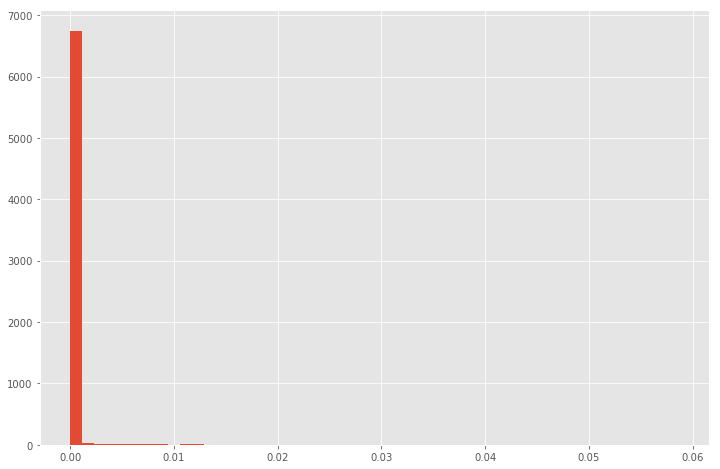

In [22]:
#normalisation TIC: calculate the sum of all peaks' intensities in a spectrum as the normalization factor and then all spectrum intensities 
#are divided by this value
data_matrix_2_ = data_matrix_2.astype(np.float64)
row_sums_2 = data_matrix_2_.sum(axis=1)
data_matrix_2 = data_matrix_2_ / row_sums_2[:, np.newaxis]
data_matrix_2.shape
plt.hist(np.log10(1+data_matrix_2[:, bin_idx_2]), bins=50)

9577 labels, 9577 real data points, 399 positives


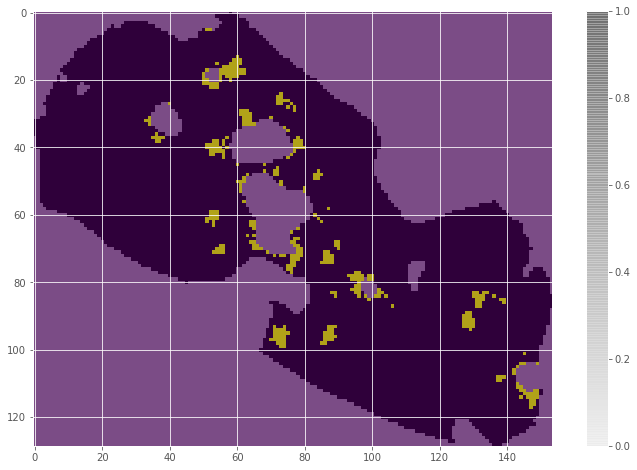

In [23]:
cutoff_1 = 0.005

labels_1 = data_matrix_1[:, bin_idx_1] > cutoff_1
print('%d labels, %d real data points, %d positives' % (len(labels_1), len(labels_1[real_rows_1]), sum(labels_1)))
#plt.imshow(make_image(labels))
#plt.imshow(make_image(labels[real_rows]))
plt.imshow(make_image_real_1(labels_1[real_rows_1]))
plt.imshow(mask_1, cmap='binary',alpha = 0.3)
#plt.imshow(np.log10(1+bin_img),alpha = 0.5) # log10 changes the distribution so we can see what's going on better

plt.colorbar()
#python 3

6869 labels, 6869 real data points, 89 positives


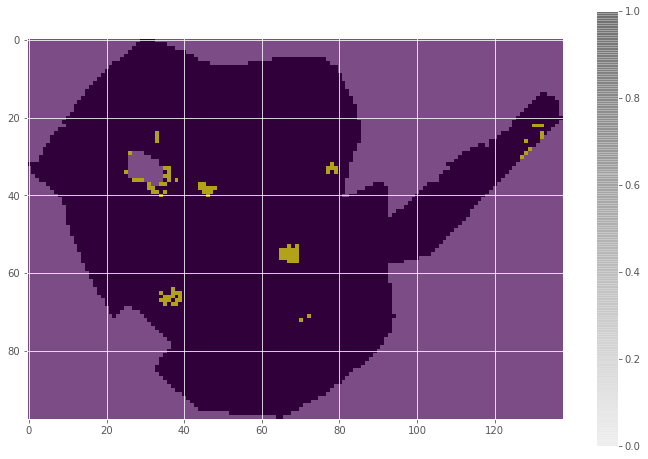

In [24]:
cutoff_2 = 0.005

labels_2 = data_matrix_2[:, bin_idx_2] > cutoff_2
print('%d labels, %d real data points, %d positives' % (len(labels_2), len(labels_2[real_rows_2]), sum(labels_2)))
#plt.imshow(make_image(labels))
#plt.imshow(make_image(labels[real_rows]))
plt.imshow(make_image_real_2(labels_2[real_rows_2]))
plt.imshow(mask_2, cmap='binary',alpha = 0.3)
#plt.imshow(np.log10(1+bin_img),alpha = 0.5) # log10 changes the distribution so we can see what's going on better

plt.colorbar()
#python 3

In [25]:
real_labels_1 = labels_1[real_rows_1]
real_data_1 = data_matrix_1[real_rows_1, :]
real_data_1 = real_data_1[:, np.arange(data_matrix_1.shape[1]) != bin_idx_1]
real_data_1.shape

(9577, 13999)

In [26]:
real_labels_2 = labels_2[real_rows_2]
real_data_2 = data_matrix_2[real_rows_2, :]
real_data_2 = real_data_2[:, np.arange(data_matrix_2.shape[1]) != bin_idx_2]
real_data_2.shape

(6869, 13999)

In [27]:
bin_idx_ = get_bin_1(5800)
bin_idx_

2956

In [28]:
bin_idx__ = get_bin_2(5800)
bin_idx__

2956

In [29]:
#filtering out m/z bins that are strongly correlated to your target bin (i.e., bins in the range 5790-5810)
index_1 = np.arange(data_matrix_1.shape[1])[2946:2966]
data_left_1 = np.delete(data_matrix_1[real_rows_1, :],index_1,1)
data_left_1.shape

(9577, 13980)

In [30]:
index_1

array([2946, 2947, 2948, 2949, 2950, 2951, 2952, 2953, 2954, 2955, 2956,
       2957, 2958, 2959, 2960, 2961, 2962, 2963, 2964, 2965])

In [31]:
#filtering out m/z bins that are strongly correlated to your target bin (i.e., bins in the range 5790-5810)
index_2 = np.arange(data_matrix_2.shape[1])[2946:2966]
data_left_2 = np.delete(data_matrix_2[real_rows_2, :],index_2,1)
data_left_2.shape

(6869, 13980)

In [32]:
real_data_1 = data_left_1
real_data_2 = data_left_2
real_labels_1.shape

(9577,)

In [33]:
real_labels = np.concatenate((real_labels_1, real_labels_2), axis=0)
real_labels.shape

(16446,)

In [34]:
real_data = np.concatenate((real_data_1, real_data_2), axis=0)
real_data.shape

(16446, 13980)

Preprocessing: peak picking

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
from sklearn.decomposition import PCA as sklearnPCA
from sklearn import preprocessing

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [37]:
#peak-picking
data_pp = SelectKBest(k=500).fit_transform(real_data, real_labels) # score function is f_classif
#data_pp = SelectKBest(chi2,k=500).fit_transform(real_data, real_labels)

In [38]:
data_pp.shape

(16446, 500)

In [39]:
index_1_ = np.arange(data_pp.shape[0])[0:9577]
index_1_

array([   0,    1,    2, ..., 9574, 9575, 9576])

In [40]:
data_pp_1 = data_pp[index_1_,:]
data_pp_1.shape

(9577, 500)

In [41]:
index_2_ = np.arange(data_pp.shape[0])[9577:16447]
data_pp_2 = data_pp[index_2_,:]
data_pp_2.shape

(6869, 500)

In [42]:
index_2_

array([ 9577,  9578,  9579, ..., 16443, 16444, 16445])

In [43]:
minvals_1 = np.amin(data_pp_1, 0)
maxvals_1 = np.amax(data_pp_1, 0)
ranges_1 = 1.0 / (maxvals_1 - minvals_1)
scaler_1 = np.diag(ranges_1)

data_pp_scaled_1 = np.dot(data_pp_1, scaler_1)
data_pp_scaled_1.shape

(9577, 500)

In [44]:
minvals_2 = np.amin(data_pp_2, 0)
maxvals_2 = np.amax(data_pp_2, 0)
ranges_2 = 1.0 / (maxvals_2 - minvals_2)
scaler_2 = np.diag(ranges_2)

data_pp_scaled_2 = np.dot(data_pp_2, scaler_2)
data_pp_scaled_2.shape

(6869, 500)

SVM

Code to run nested cross-validation experiment, which involves

    outer cross-validation: 2 folds, returns list of (auc, predictions) per fold
    inner cross-validation: tuning hyperparameters (using 2x3 fold cv)



In [45]:
from sklearn.svm import SVC, LinearSVC
from sklearn import metrics
import optunity
import optunity.metrics
import optunity.cross_validation

In [50]:
# extend data matrix to include spatial location of pixels in first 2 cols
data_1 = np.hstack((real_rows_xy_1, data_pp_scaled_1))

@optunity.cross_validated(x=data_1, y=real_labels_1, num_folds=2,
                         aggregator=optunity.cross_validation.identity)
def nested_cv(x_train, y_train, x_test, y_test):

    # extract spatial location of pixels (first 2 cols)
    x_train = x_train[:, 2:]
    rows = x_test[:, 0]
    cols = x_test[:, 1]
    x_test = x_test[:, 2:]
    
    # inner cross-validation to estimate performance of a set of hyperparameters
    @optunity.cross_validated(x=x_train, y=y_train, num_folds=3, num_iter=2)
    def inner_cv(x_train, y_train, x_test, y_test, C):
        model = LinearSVC(C=C).fit(x_train, y_train)
        predictions = model.decision_function(x_test)
        roc = optunity.metrics.roc_auc(y_test, predictions)
        #print('auroc in xval: %1.3f' % roc)
        return roc
    
    hpars, info, _ = optunity.maximize(inner_cv, num_evals=10, C=[0, 10], pmap=optunity.parallel.pmap)
    print('')
    print('Hyperparameters: ' + str(hpars))
    print('Cross-validated AUROC after tuning: %1.3f' % info.optimum)
    model = LinearSVC(**hpars).fit(x_train, y_train)
    predictions = model.decision_function(x_test)
    auc = optunity.metrics.roc_auc(y_test, predictions)
    return (auc, np.vstack((rows, cols, predictions)),np.vstack((rows, cols, y_test)))

Run nested cross-validation procedure and retain results

In [52]:
res = nested_cv()
mean_roc_auc = sum(map(op.itemgetter(0), res)) / len(res)
print('')
print('Mean area under ROC curve in outer cross-validation: %1.3f' % mean_roc_auc)


Hyperparameters: {'C': 1.73828125}
Cross-validated AUROC after tuning: 0.969

Hyperparameters: {'C': 0.185546875}
Cross-validated AUROC after tuning: 0.984

Mean area under ROC curve in outer cross-validation: 0.978


In [64]:
#C_svc * n_samples = 1 / alpha_sgd
import numpy as np
from sklearn import linear_model
data_2 = np.hstack((real_rows_xy_2, data_pp_scaled_2))

@optunity.cross_validated(x=data_2, y=real_labels_2, num_folds=2,
                         aggregator=optunity.cross_validation.identity)
def nested_cv_1(x_train, y_train, x_test, y_test):

    # extract spatial location of pixels (first 2 cols)
    x_train = x_train[:, 2:]
    rows = x_test[:, 0]
    cols = x_test[:, 1]
    x_test = x_test[:, 2:]
    
    clf = linear_model.SGDClassifier(alpha = 0.0001)
    clf.fit(x_train, y_train)
    predictions = clf.decision_function(x_test)
    auc = optunity.metrics.roc_auc(y_test, predictions)
    return (auc, np.vstack((rows, cols, predictions)),np.vstack((rows, cols, y_test)))

In [65]:
res_1 = nested_cv_1()
mean_roc_auc_1 = sum(map(op.itemgetter(0), res_1)) / len(res_1)
print('')
print('Mean area under ROC curve in outer cross-validation: %1.3f' % mean_roc_auc_1)


Mean area under ROC curve in outer cross-validation: 0.958


Construct matrix of (out-of-sample) predictions for each pixel.

In [58]:
predictions = np.hstack(map(op.itemgetter(1), res_1))
prediction_matrix = np.zeros((nrows_2, ncols_2))
for i in range(predictions.shape[1]):
    row = predictions[0, i]
    col = predictions[1, i]
    val = predictions[2, i]
    prediction_matrix[row, col] = val

/esat/bioidata/guests/wzhang/wanqiu/conda/lib/python3.6/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [57]:
y_test = np.hstack(map(op.itemgetter(2), res_1))
y_test_matrix = np.zeros((nrows_2, ncols_2))
for i in range(y_test.shape[1]):
    row = y_test[0, i]
    col = y_test[1, i]
    val = y_test[2, i]
    y_test_matrix[row, col] = val

/esat/bioidata/guests/wzhang/wanqiu/conda/lib/python3.6/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


/esat/bioidata/guests/wzhang/wanqiu/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


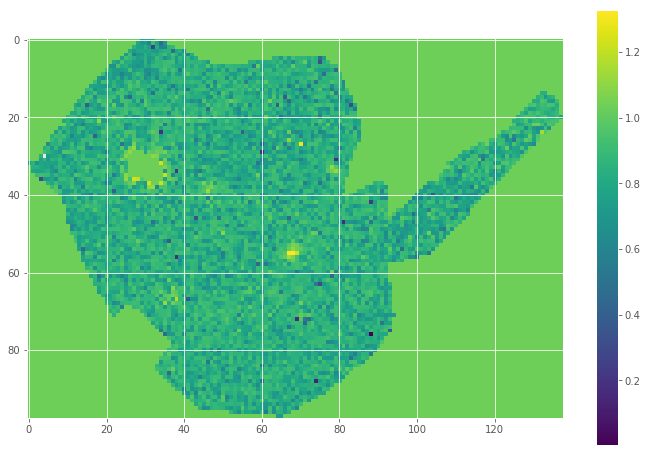

In [59]:
plt.imshow(np.log10(prediction_matrix - prediction_matrix[:].min()))
#plt.imshow(prediction_matrix)
#plt.imshow(prediction_matrix > 0) # default svm treshold
plt.colorbar()

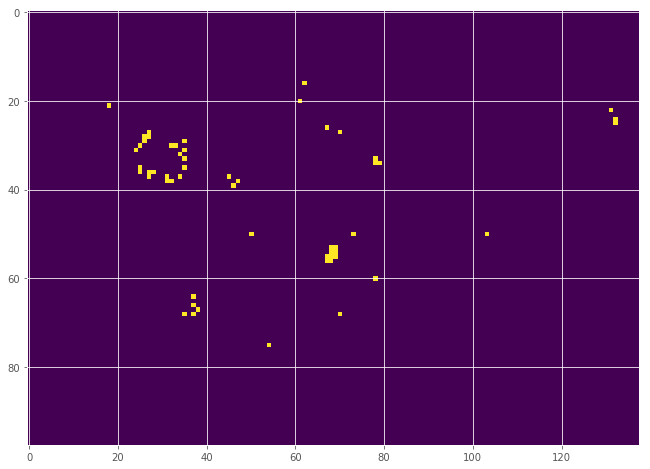

In [60]:
plt.imshow(prediction_matrix > 0) # default svm threshold

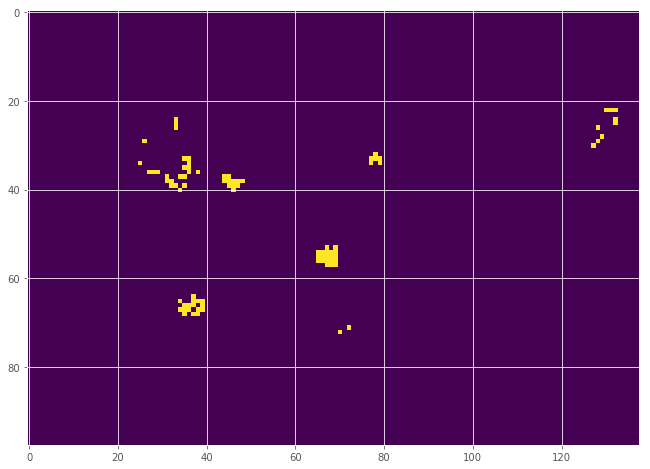

In [61]:
plt.imshow(y_test_matrix)

26 False_Positive, 59 False_Negative


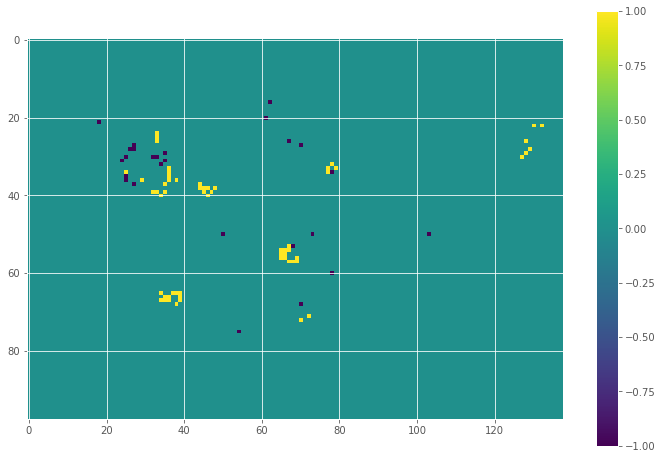

In [62]:
y_predict = prediction_matrix > 0

plt.imshow(y_test_matrix - y_predict)

#plt.imshow(np.log10(1+bin_img_2),alpha = 0.4)
plt.colorbar()
False_Negative = (y_test_matrix - y_predict) > 0
False_Positive = (y_test_matrix- y_predict) < 0
print('%d False_Positive, %d False_Negative' % (np.sum(False_Positive), np.sum(False_Negative)))
# yellow dots are False Negative, bule dots are False Positive

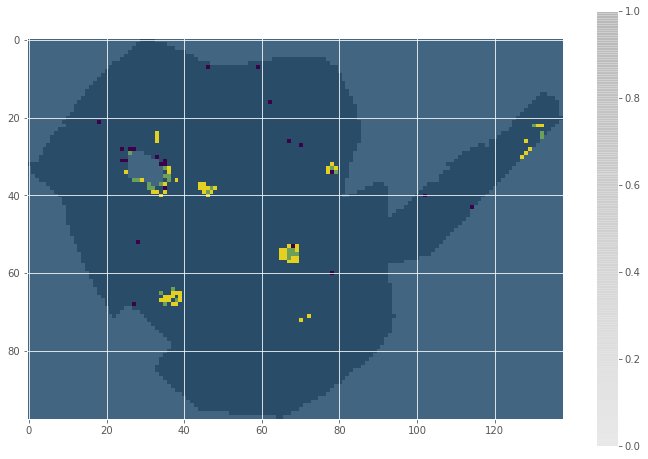

In [87]:
plt.imshow(y_test_matrix - y_predict)
plt.imshow(make_image_real_2(labels_2[real_rows_2]),alpha = 0.4)
plt.imshow(mask_2, cmap='binary',alpha = 0.1)
plt.colorbar()
# Green dots are labeled part,yellow dots are False Negative, bule dots are False Positive